## <span style=color:red> Finding and classifying equilibrium points </span>

Steps:
  - Find equilibrium point
  - Get the Jacobian
  - Test the eigenvalues

## <span style='color:red'> Solve Equilibrium Points for Continuous Time System </span>

Example: Shark Tuna model:

$S' = 0.01ST-0.2S$

$T' = 0.05T-0.01ST$

In [3]:
_=var('S,T')
S_prime = 0.01*S*T-0.2*S
T_prime = 0.05*T-0.01*S*T

sol = solve([S_prime==0,T_prime==0],(S,T))
show(sol)

[[S == 0, T == 0], [S == 5, T == 20]]

### How to retrieve the result? 

In [4]:
sol

[[S == 0, T == 0], [S == 5, T == 20]]

In [5]:
sol[0]

[S == 0, T == 0]

In [7]:
sol[0][0]
sol[0][1]

T == 0

In [9]:
sol[0][1].rhs()
sol[0][1].rhs()

0

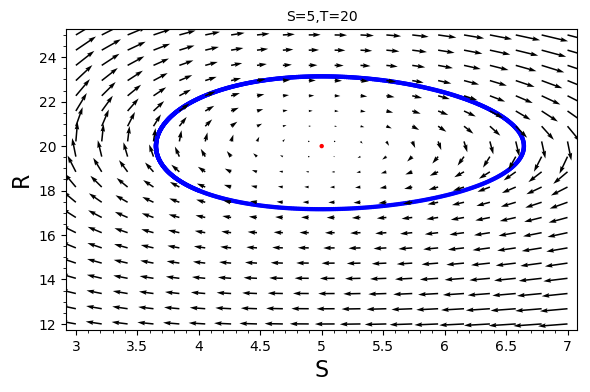

[-1/10*I, 1/10*I]

In [16]:
t = srange(0,100,0.1)
sol = desolve_odeint([S_prime,T_prime],ics =[4,18],times=t,dvars=[S,T])

fig1 = plot_vector_field((S_prime,T_prime),(S,3,7),(T,12,25),title='S=5,T=20')
fig2= point((5,20),color='red')
fig3 = list_plot(zip(sol[:,0],sol[:,1]),axes_labels=['S','R'])
show(fig1+fig2+fig3)

j = jacobian([S_prime,T_prime],[S,T])
j2 = j.subs({S:5,T:20})
show(j2.eigenvalues())

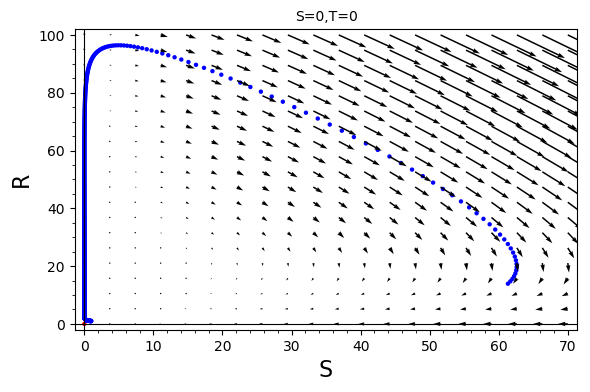

[1/20, -1/5]

In [17]:
t = srange(0,100,0.1)
sol = desolve_odeint([S_prime,T_prime],ics =[1,1],times=t,dvars=[S,T])

fig1 = plot_vector_field((S_prime,T_prime),(S,0,70),(T,0,100),title='S=0,T=0')
fig2= point((0,0),color='red')
fig3 = list_plot(zip(sol[:,0],sol[:,1]),axes_labels=['S','R'])
show(fig1+fig2+fig3)

j = jacobian([S_prime,T_prime],[S,T])
j1 = j.subs({S:0,T:0})
show(j1.eigenvalues())

[1/20, -1/5]

[-1/10*I, 1/10*I]

## <span style ='color:red'> Solve Does not Always Work </span>

### Model we are going to use today: 

$H' = \frac{1}{1+G^n}-0.2H$

$P'=H-0.2P$

$G'=P-0.2G$

In [11]:
_ = var('H,P,G')
n=12
H_prime=1/(1+G^n)-0.2*H
P_prime=H-0.2*P
G_prime=P-0.2*G

sol = solve([H_prime,P_prime,G_prime],(H,P,G))
show(sol)

[[H == (0.05131908197926095 - 0.02690696184783255*I), P == (0.2565954098963048 - 0.1345348092391625*I), G == (1.282977049481524 - 0.6726740461958126*I)], [H == (0.05131908197926095 + 0.02690696184783255*I), P == (0.2565954098963047 + 0.1345348092391625*I), G == (1.282977049481524 + 0.6726740461958126*I)], [H == (-0.056351547749695 - 0.01390205175168626*I), P == (-0.2817577387484757 - 0.06951025875843178*I), G == (-1.408788693742378 - 0.3475512937921589*I)], [H == (-0.056351547749695 + 0.01390205175168626*I), P == (-0.281757738748475 + 0.06951025875843156*I), G == (-1.408788693742375 + 0.3475512937921578*I)], [H == (0.007040360310592184 - 0.05755603677267915*I), P == (0.03520180155296103 - 0.2877801838633958*I), G == (0.1760090077648051 - 1.438900919316979*I)], [H == (0.007040360310592184 + 0.05755603677267915*I), P == (0.03520180155296099 + 0.2877801838633958*I), G == (0.176009007764805 + 1.438900919316979*I)], [H == 0.05793905372894948, P == 0.2896952686447474, G == 1.448476307909107], [H == (-0.02052537795378058 - 0.05425696180651133*I), P == (-0.1026268897689029 - 0.2712848090325566*I), G == (-0.5131344488445144 - 1.356424045162783*I)], [H == (-0.02052537795378058 + 0.05425696180651133*I), P == (-0.1026268897689029 + 0.2712848090325567*I), G == (-0.5131344488445144 + 1.356424045162783*I)], [H == (-0.04341326926367482 - 0.03850633156028379*I), P == (-0.217066346318374 - 0.1925316578014208*I), G == (-1.08533173159187 - 0.9626582890071043*I)], [H == (-0.04341326926367482 + 0.03850633156028379*I), P == (-0.2170663463183741 + 0.192531657801419*I), G == (-1.08533173159187 + 0.9626582890070949*I)], [H == (0.03296122673830323 - 0.04767724533227586*I), P == (0.1648061336915137 - 0.238386226661381*I), G == (0.8240306684575683 - 1.191931133306905*I)], [H == (0.03296122673830323 + 0.04767724533227586*I), P == (0.1648061336915161 + 0.2383862266613793*I), G == (0.8240306684575807 + 1.191931133306896*I)]]

### None of them are real number!!! But there is at least one root!!!

#### <span style=color:red> What should we do when solve does not work? </span>

####  Use: find_root!!!

#### <span style='color:red'> find_root Can find "One" equilibrium point </span>

####  For a "one" variable equation 

##### Example: $x^7+cos(x)+2x-300$

In [90]:
_=var('x')

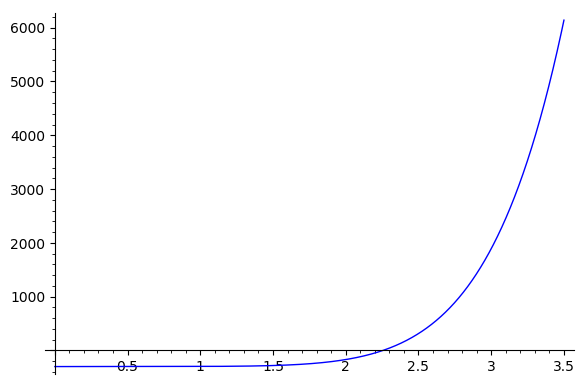

In [91]:
plot(x^7+cos(x)+2*x-300,(x,0,3.5))

<span style='color:red'>There is definitely a root between 2 and 3</span>
```
find_root(fun,x_min,x_max,tolerlance)
```

In [100]:
find_root(x^7+cos(x)+2*x-300,2,3,rtol=0.001)

2.2545915040920135

### <span style=color:blue> But there are 3 variables, not one! </span>

$H' = \frac{1}{1+G^n}-0.2H$

$P'=H-0.2P$

$G'=P-0.2G$

#### However, if we only need to find equilibrium point, we only need to solve one variable!!!

$0 = \frac{1}{1+G^n}-0.2H$

$0=H-0.2P\implies 5H = P$

$0=P-0.2G\implies 5P=G$

$\implies 25H = G$

<span style= color:red>Finding equilibrium point is just solving a function of H!!!!</span>